# WeatherPy
----

#### Observasion

Regarding the relationship between latitude and temperature, besides a few outliers, the scatter plot appears to be a bell shaped pattern, indicates that there is a non-linear relationship between latitude and temperature. 

Potentially we can check the data, to find the missing variable can help to build a more accurate non-linear relationship among the latitude, temperature and the variable that we found.

Furthermore, based on the linear regression analysis, it appears that there is a strong correlation between temperature and latitude. In northern hemisphere, these two factors appear to have a relatively strong negative correlation, however in northern hemisphere, it also indicates a strong correlation but in positive direction.

Lastly the analysis also compared the relationship among humidity, cloudiness, and wind speed to latitude. All indicates that here is no relationship among these factors 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [4]:

# set up lists to hold reponse info
city_checked=[]
lng = []
lat = []
temp = []
humidity = []
wind = []
cloud = []
country = []
date=[]
record_count=0
set_count=0


# Loop through the list of cities and perform a request for data on each city

    
for i, city in enumerate(cities):
    set_count = i // 50 + 1
    record_count= i % 50 + 1 

    try:
        response = requests.get(query_url + city).json()  
        city_checked.append(response['name'])
        lng.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        date.append(response['dt'])
        country.append(response['sys']['country'])

            #print a print log of each city as it'sbeing processed (with the city number and city name)
        print(f"Processing Record {record_count} of set {set_count} |{city}")
    except (KeyError, IndexError):
        print("City not found. Skipping...")

      

Processing Record 1 of set 1 |kisanga
Processing Record 2 of set 1 |hobart
Processing Record 3 of set 1 |rikitea
Processing Record 4 of set 1 |hermanus
Processing Record 5 of set 1 |mataura
Processing Record 6 of set 1 |sharya
Processing Record 7 of set 1 |mancio lima
Processing Record 8 of set 1 |hilo
Processing Record 9 of set 1 |namatanai
Processing Record 10 of set 1 |bluff
Processing Record 11 of set 1 |savelugu
City not found. Skipping...
Processing Record 13 of set 1 |aykhal
Processing Record 14 of set 1 |san cristobal
Processing Record 15 of set 1 |acapulco
Processing Record 16 of set 1 |vaini
Processing Record 17 of set 1 |albany
Processing Record 18 of set 1 |castro
Processing Record 19 of set 1 |ilulissat
Processing Record 20 of set 1 |korla
Processing Record 21 of set 1 |vao
Processing Record 22 of set 1 |gumia
Processing Record 23 of set 1 |esperance
Processing Record 24 of set 1 |ponta do sol
Processing Record 25 of set 1 |georgetown
Processing Record 26 of set 1 |ushuaia

Processing Record 10 of set 5 |carnarvon
Processing Record 11 of set 5 |vondrozo
Processing Record 12 of set 5 |saint-philippe
Processing Record 13 of set 5 |botevgrad
Processing Record 14 of set 5 |avarua
Processing Record 15 of set 5 |luis correia
Processing Record 16 of set 5 |mala
Processing Record 17 of set 5 |poya
Processing Record 18 of set 5 |grindavik
Processing Record 19 of set 5 |port alfred
Processing Record 20 of set 5 |rock sound
Processing Record 21 of set 5 |ponta delgada
Processing Record 22 of set 5 |cairns
Processing Record 23 of set 5 |hasaki
Processing Record 24 of set 5 |pevek
City not found. Skipping...
Processing Record 26 of set 5 |rincon
Processing Record 27 of set 5 |nemuro
Processing Record 28 of set 5 |smirnykh
Processing Record 29 of set 5 |hay river
Processing Record 30 of set 5 |ancud
Processing Record 31 of set 5 |dolgoye
Processing Record 32 of set 5 |kieta
Processing Record 33 of set 5 |necochea
Processing Record 34 of set 5 |labuhan
Processing Record

Processing Record 17 of set 9 |pemba
Processing Record 18 of set 9 |pimentel
Processing Record 19 of set 9 |wenling
Processing Record 20 of set 9 |rongcheng
Processing Record 21 of set 9 |kloulklubed
Processing Record 22 of set 9 |biak
Processing Record 23 of set 9 |forrest city
Processing Record 24 of set 9 |kjollefjord
Processing Record 25 of set 9 |kota bahru
Processing Record 26 of set 9 |yulara
Processing Record 27 of set 9 |akdepe
Processing Record 28 of set 9 |port hardy
Processing Record 29 of set 9 |naze
Processing Record 30 of set 9 |zambrano
Processing Record 31 of set 9 |dahra
Processing Record 32 of set 9 |goderich
Processing Record 33 of set 9 |shache
City not found. Skipping...
Processing Record 35 of set 9 |meulaboh
City not found. Skipping...
Processing Record 37 of set 9 |bulawayo
Processing Record 38 of set 9 |severo-kurilsk
Processing Record 39 of set 9 |faya
Processing Record 40 of set 9 |zhigansk
Processing Record 41 of set 9 |vagur
Processing Record 42 of set 9 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": city_checked,
    "lng": lng,
    "lat": lat,
    "Max Temp": temp,
    "Humidity": humidity,
    "Wind Speed": wind,
    "Cloudiness": cloud,
    "Country": country,
    "Date": date
    
}
weather_data = pd.DataFrame(weather_dict)

In [6]:
# Save the updated dataframe as a csv
weather_data.to_csv("../output_data/weather_data.csv", encoding="utf-8", index=False)
weather_data.head()

,city,lng,lat,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
0,Kisanga,37.7034,-7.4362,30.24,43,2.75,87,TZ,1624017914
1,Hobart,147.3294,-42.8794,11.07,90,0.89,75,AU,1624017727
2,Rikitea,-134.9692,-23.1203,23.64,66,9.76,64,PF,1624017915
3,Hermanus,19.2345,-34.4187,22.17,60,4.16,9,ZA,1624017915
4,Mataura,168.8643,-46.1927,2.49,87,2.32,1,NZ,1624017915


In [7]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        550 non-null    object 
 1   lng         550 non-null    float64
 2   lat         550 non-null    float64
 3   Max Temp    550 non-null    float64
 4   Humidity    550 non-null    int64  
 5   Wind Speed  550 non-null    float64
 6   Cloudiness  550 non-null    int64  
 7   Country     550 non-null    object 
 8   Date        550 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 38.8+ KB


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_data_path="../output_data/weather_data.csv"
weather_data_df=pd.read_csv(weather_data_path,encoding="utf-8")
weather_data_df.describe()

,lng,lat,Max Temp,Humidity,Wind Speed,Cloudiness,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,18.248122,19.950351,20.493236,67.241818,3.475727,55.716364,1.624018e+09
std,89.639053,33.471544,8.948535,22.694408,2.281611,38.146438,6.968792e+01
min,-179.166700,-54.800000,-0.150000,3.000000,0.000000,0.000000,1.624018e+09
25%,-59.749975,-8.120975,13.792500,53.000000,1.710000,18.000000,1.624018e+09
50%,21.793600,23.938350,22.055000,72.000000,2.935000,66.000000,1.624018e+09
75%,97.442100,48.701075,26.642500,84.000000,4.900000,92.750000,1.624018e+09
max,179.316700,78.218600,45.200000,100.000000,12.810000,100.000000,1.624018e+09


In [9]:
#  Get the indices of cities that have humidity equal or over 100%.

Humidity_100=weather_data_df.loc[weather_data_df["Humidity"]>=100]

print (Humidity_100)



            city       lng      lat  Max Temp  Humidity  Wind Speed  \
14         Vaini -175.2000 -21.2000     20.09       100        2.06   
69    High Level -117.1360  58.5169      7.06       100        0.00   
142  Clyde River  -68.5914  70.4692      0.13       100        2.57   
167      Neuquén  -68.0591 -38.9516      0.94       100        3.09   
239      Iqaluit  -68.5145  63.7506     -0.15       100        3.58   
325     Coquimbo  -71.3436 -29.9533      9.85       100        2.06   
351    Sept-Îles  -66.3821  50.2001     10.29       100        1.54   

     Cloudiness Country        Date  
14           20      TO  1624017918  
69           20      CA  1624017932  
142          90      CA  1624017952  
167          90      AR  1624017958  
239          90      CA  1624017976  
325          90      CL  1624017999  
351          90      CA  1624018006  


In [10]:
#check the index of cities with humidity equal or over 100
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
Humidity_100.index

Int64Index([14, 69, 142, 167, 239, 325, 351], dtype='int64')

In [11]:
# dropping the city with humidity equal or over 100 by reference the humidity_100 index
# Passing "inplace=False" and make a new data fram "clean_data".
clean_data=weather_data_df.drop(Humidity_100.index, inplace = False)
clean_data

,city,lng,lat,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
0,Kisanga,37.7034,-7.4362,30.24,43,2.75,87,TZ,1624017914
1,Hobart,147.3294,-42.8794,11.07,90,0.89,75,AU,1624017727
2,Rikitea,-134.9692,-23.1203,23.64,66,9.76,64,PF,1624017915
3,Hermanus,19.2345,-34.4187,22.17,60,4.16,9,ZA,1624017915
4,Mataura,168.8643,-46.1927,2.49,87,2.32,1,NZ,1624017915
...,...,...,...,...,...,...,...,...,...
545,Kitui,38.0106,-1.3670,22.35,56,4.88,100,KE,1624018062
546,Bitkine,18.2138,11.9801,35.87,31,1.63,76,TD,1624018063
547,Mayo,-76.5119,38.8876,21.11,62,1.79,1,US,1624018063
548,Hammerfest,23.6821,70.6634,10.25,71,5.66,40,NO,1624018063


In [12]:
clean_data.describe()

,lng,lat,Max Temp,Humidity,Wind Speed,Cloudiness,Date
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02
mean,19.653211,19.926080,20.668637,66.819521,3.493094,55.532228,1.624018e+09
std,89.244192,33.286814,8.836778,22.531090,2.287853,38.188482,7.004360e+01
min,-179.166700,-54.800000,0.740000,3.000000,0.000000,0.000000,1.624018e+09
25%,-58.205100,-7.764050,14.035000,53.000000,1.710000,15.500000,1.624018e+09
50%,23.682100,23.783300,22.170000,72.000000,2.950000,65.000000,1.624018e+09
75%,98.648300,47.649250,26.700000,84.000000,4.960000,93.000000,1.624018e+09
max,179.316700,78.218600,45.200000,98.000000,12.810000,100.000000,1.624018e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [13]:
#to add the analysis datetime into the plot
x=datetime.now()
print (x)

2021-06-18 22:09:12.877591


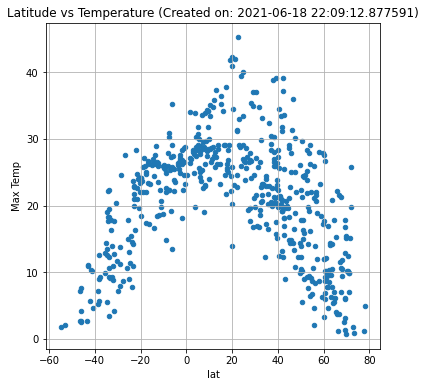

In [14]:
#Latitude vs. Temperature Plot

clean_data.plot(kind="scatter", x="lat", y="Max Temp", grid=True, figsize=(6,6),
              title=(f"Latitude vs Temperature (Created on: {x})"))
plt.savefig("../output_data/lat vs Temp.png") 

There are a few outliers, however, the scotter plot appears to be a bell shapped pattern, indicates that there is a non-linear relationship between latitude and temperature. 
Potentially we can check the data, to find the missing virable can help to buld a more accurate non-linear relationthip among the latitude, temperature and the varible that we found.

## Latitude vs. Humidity Plot

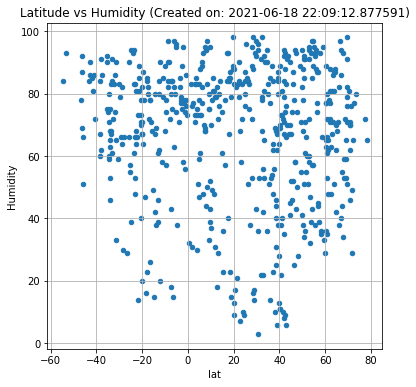

In [15]:
#Latitude vs. Humidity Plot
clean_data.plot(kind="scatter", x="lat", y="Humidity", grid=True, figsize=(6,6),
              title=(f"Latitude vs Humidity (Created on: {x})"))
plt.savefig("../output_data/lat vs Humidity.png") 

This is no clear pattern based on the Lat and Humidity plot, indicates that there is no relationship between Latitude and humidity.

## Latitude vs. Cloudiness Plot

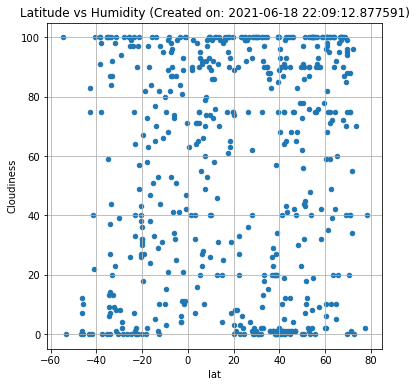

In [16]:
#Latitude vs. Cloudiness Plot
clean_data.plot(kind="scatter", x="lat", y="Cloudiness", grid=True, figsize=(6,6),
              title=(f"Latitude vs Humidity (Created on: {x})"))
plt.savefig("../output_data/lat vs Cloudiness.png") 

This is no clear pattern based on the Latitude and cloudiness plot, indicates that there is no relationship between Latitude and humidity.

## Latitude vs. Wind Speed Plot

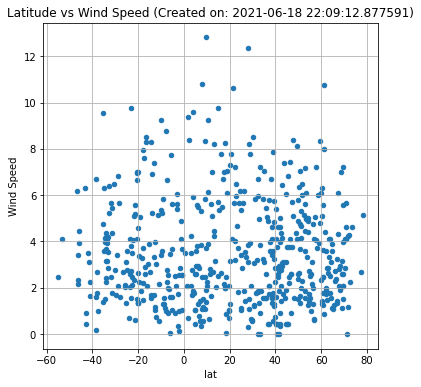

In [18]:
#Latitude vs. Wind Speed Plot
clean_data.plot(kind="scatter", x="lat", y="Wind Speed", grid=True, figsize=(6,6),
               title=(f"Latitude vs Wind Speed (Created on: {x})"))
plt.savefig("../output_data/lat vs Wind Speed.png") 

This is no clear pattern based on the Latitude and cloudiness plot, indicates that there is no relationship between Latitude and humidity.

## Linear Regression


#Northern Hemisphere (greater than or equal to 0 degrees latitude) and 
#Southern Hemisphere (less than 0 degrees latitude)

In [19]:
#setup a Northern Hemishpere dataframe
Northern_Hemisphere=weather_data_df.loc[weather_data_df["lat"]>=0.00]
Northern_Hemisphere.head()                                                     

,city,lng,lat,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
5,Shar'ya,45.5144,58.3686,23.19,35,3.72,42,RU,1624017915
7,Hilo,-155.0900,19.7297,22.11,89,2.06,75,US,1624017916
10,Savelugu,-0.8253,9.6244,34.22,43,3.71,40,GH,1624017917
11,Aykhal,111.5000,66.0000,22.19,38,2.28,95,RU,1624017917
12,San Cristobal,-72.2250,7.7669,19.08,94,2.44,92,VE,1624017917


In [20]:
#setup a Southern Hemishpere dataframe
Southern_Hemisphere=weather_data_df.loc[weather_data_df["lat"]<0.00]
Southern_Hemisphere.describe()   

,lng,lat,Max Temp,Humidity,Wind Speed,Cloudiness,Date
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,1.730000e+02
mean,25.235634,-21.293761,18.863526,70.682081,3.439595,49.861272,1.624018e+09
std,92.789729,12.992592,7.857162,19.223217,2.142860,37.565963,6.604456e+01
min,-175.200000,-54.800000,0.940000,14.000000,0.030000,0.000000,1.624018e+09
25%,-53.806900,-32.500000,12.520000,63.000000,1.790000,11.000000,1.624018e+09
50%,21.850000,-20.342800,21.960000,75.000000,2.880000,44.000000,1.624018e+09
75%,115.333300,-10.068100,25.510000,84.000000,4.570000,89.000000,1.624018e+09
max,177.283300,-0.600000,35.150000,100.000000,9.760000,100.000000,1.624018e+09


In [21]:
max_temp=Northern_Hemisphere.iloc[:,3]
max_temp

5      23.19
7      22.11
10     34.22
11     22.19
12     19.08
       ...  
544    27.72
546    35.87
547    21.11
548    10.25
549    25.01
Name: Max Temp, Length: 377, dtype: float64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

the correlation between weight and tumor volume is -0.7
R squared: 0.49039509738996845


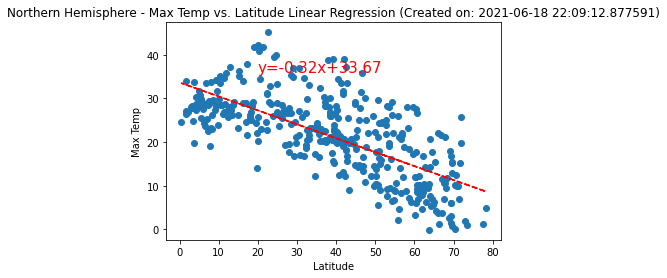

In [23]:
# Calculate the correlation coefficient and linear regression model eight=Capomulin_weight_volume.iloc[:,0]
lat=Northern_Hemisphere.iloc[:,2]
max_temp=Northern_Hemisphere.iloc[:,3]
correlation=st.pearsonr(lat,max_temp)

slope, intercept, rvalue, pvalue, stderr = st.linregress(lat,max_temp)
regress_values=lat*slope+intercept
regress_values
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(lat,max_temp)
plt.plot(lat,regress_values,"--",color="r")
plt.annotate(line_eq,(20,36),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression (Created on: {x})")
print(f"the correlation between weight and tumor volume is {round(correlation[0],2)}")
print(f"R squared: {rvalue**2}")  
plt.savefig("../output_data/Northern Hemisphere lat vs Max temp linear regressoin.png") 
plt.show()

The correlation between temperature and Latitude in nothern hemisphere is -0.7, indicates a relatively strong negetive correlation.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the correlation between weight and tumor volume is 0.81
R squared: 0.6526930595255488


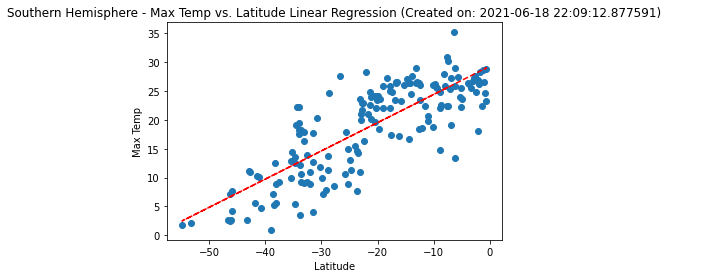

In [24]:
# Calculate the correlation coefficient and linear regression model eight=Capomulin_weight_volume.iloc[:,0]
lat=Southern_Hemisphere.iloc[:,2]
max_temp=Southern_Hemisphere.iloc[:,3]
correlation=st.pearsonr(lat,max_temp)

slope, intercept, rvalue, pvalue, stderr = st.linregress(lat,max_temp)
regress_values=lat*slope+intercept
regress_values
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(lat,max_temp)
plt.plot(lat,regress_values,"--",color="r")
plt.annotate(line_eq,(20,36),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression (Created on: {x})")
print(f"the correlation between weight and tumor volume is {round(correlation[0],2)}")
print(f"R squared: {rvalue**2}")

plt.savefig("../output_data/Southern Hemisphere lat vs Max temp linear regressoin.png") 
plt.show()  

 The correlation between temperature and Latitude in southern hemisphere is 0.81, indicates a strong positive correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the correlation between Latitude and humidity is 0.02
R squared: 0.00045932290291805767


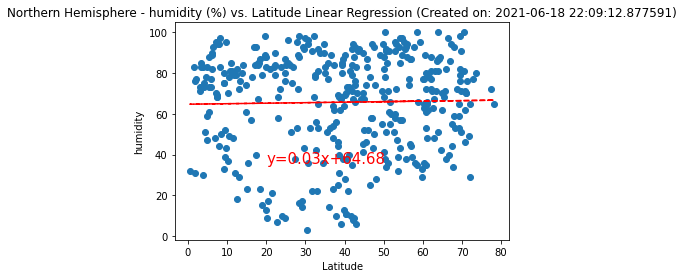

In [25]:
# Calculate the correlation coefficient and linear regression model eight=Capomulin_weight_volume.iloc[:,0]
lat=Northern_Hemisphere.iloc[:,2]
humidity=Northern_Hemisphere.iloc[:,4]
correlation=st.pearsonr(lat,humidity)

slope, intercept, rvalue, pvalue, stderr = st.linregress(lat,humidity)
regress_values=lat*slope+intercept
regress_values
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(lat,humidity)
plt.plot(lat,regress_values,"--",color="r")
plt.annotate(line_eq,(20,36),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("humidity")
plt.title(f"Northern Hemisphere - humidity (%) vs. Latitude Linear Regression (Created on: {x})")
print(f"the correlation between Latitude and humidity is {round(correlation[0],2)}")
print(f"R squared: {rvalue**2}") 
plt.savefig("../output_data/Northern_Hemisphere lat vs Humidity linear regressoin.png") 
plt.show()  

The correlation between humidity and Latitude in nothern hemisphere is 0.02, indicates no correlation between these two factors.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the correlation between Latitude and humidity is -0.07
R squared: 0.005302622548073489


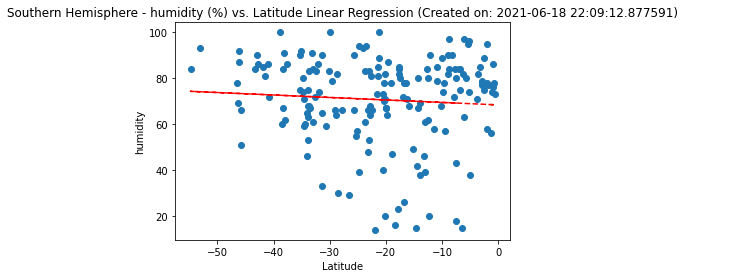

In [27]:
# Calculate the correlation coefficient and linear regression model eight=Capomulin_weight_volume.iloc[:,0]
lat=Southern_Hemisphere.iloc[:,2]
humidity=Southern_Hemisphere.iloc[:,4]
correlation=st.pearsonr(lat,humidity)

slope, intercept, rvalue, pvalue, stderr = st.linregress(lat,humidity)
regress_values=lat*slope+intercept
regress_values
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(lat,humidity)
plt.plot(lat,regress_values,"--",color="r")
plt.annotate(line_eq,(20,36),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("humidity")
plt.title(f"Southern Hemisphere - humidity (%) vs. Latitude Linear Regression (Created on: {x})")
print(f"the correlation between Latitude and humidity is {round(correlation[0],2)}")
print(f"R squared: {rvalue**2}") 
plt.savefig("../output_data/Southernn_Hemisphere lat vs Humidity linear regressoin.png") 
plt.show()  

The correlation between humidity and Latitude in southern hemisphere is -0.07, indicates no correlation between these two factors.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the correlation between Latitude and Cloudiness is 0.0
R squared: 4.164635034721502e-06


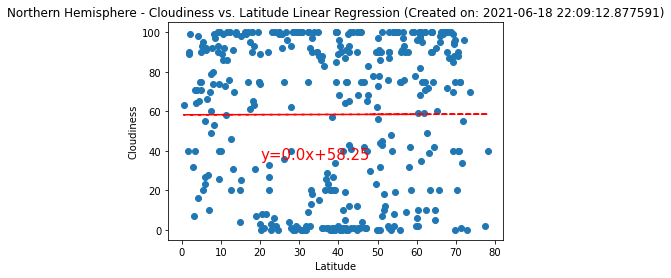

In [28]:
# Calculate the correlation coefficient and linear regression model eight=Capomulin_weight_volume.iloc[:,0]
lat=Northern_Hemisphere.iloc[:,2]
Cloudiness=Northern_Hemisphere.iloc[:,6]
correlation=st.pearsonr(lat,Cloudiness)

slope, intercept, rvalue, pvalue, stderr = st.linregress(lat,Cloudiness)
regress_values=lat*slope+intercept
regress_values
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(lat,Cloudiness)
plt.plot(lat,regress_values,"--",color="r")
plt.annotate(line_eq,(20,36),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Northern Hemisphere - Cloudiness vs. Latitude Linear Regression (Created on: {x})")
print(f"the correlation between Latitude and Cloudiness is {round(correlation[0],2)}")
print(f"R squared: {rvalue**2}") 
plt.savefig("../output_data/Northern_Hemisphere lat vs Cloudiness linear regressoin.png") 
plt.show()  

The correlation between cloudiness and Latitude in nothern hemisphere is 0.0, indicates no correlation between these two factors.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the correlation between Latitude and Cloudiness is 0.15
R squared: 0.022137060931153175


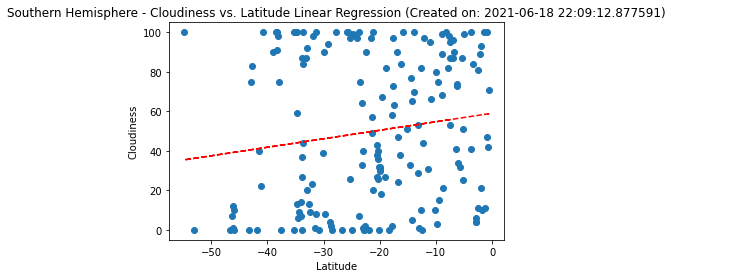

In [29]:
# Calculate the correlation coefficient and linear regression model eight=Capomulin_weight_volume.iloc[:,0]
lat=Southern_Hemisphere.iloc[:,2]
Cloudiness=Southern_Hemisphere.iloc[:,6]
correlation=st.pearsonr(lat,Cloudiness)

slope, intercept, rvalue, pvalue, stderr = st.linregress(lat,Cloudiness)
regress_values=lat*slope+intercept
regress_values
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(lat,Cloudiness)
plt.plot(lat,regress_values,"--",color="r")
plt.annotate(line_eq,(20,36),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Southern Hemisphere - Cloudiness vs. Latitude Linear Regression (Created on: {x})")
print(f"the correlation between Latitude and Cloudiness is {round(correlation[0],2)}")
print(f"R squared: {rvalue**2}") 
plt.savefig("../output_data/Southernn_Hemisphere lat vs Cloudiness linear regressoin.png") 
plt.show()  

The correlation between cloudiness and Latitude in southern hemisphere is 0.15, indicates no correlation between these two factors.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the correlation between Latitude and Wind Speed is -0.07
R squared: 0.005394274826615993


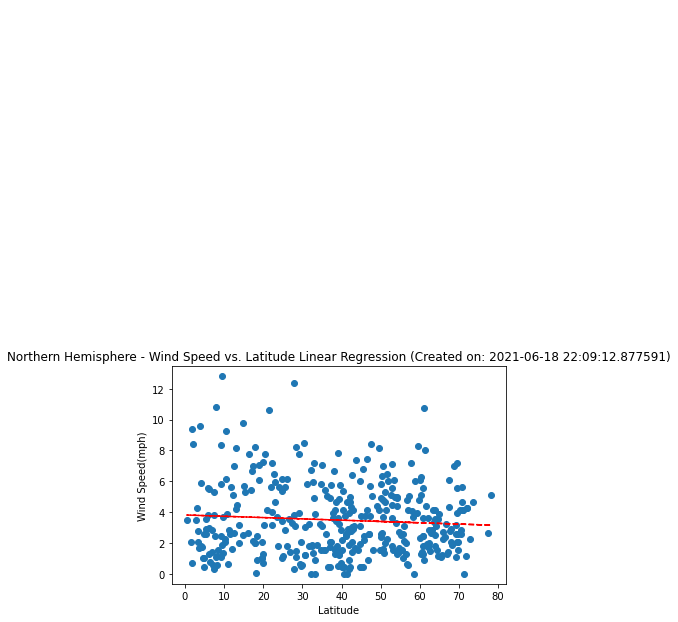

In [30]:
# Calculate the correlation coefficient and linear regression model eight=Capomulin_weight_volume.iloc[:,0]
lat=Northern_Hemisphere.iloc[:,2]
Wind_Speed=Northern_Hemisphere.iloc[:,5]
correlation=st.pearsonr(lat,Wind_Speed)
slope, intercept, rvalue, pvalue, stderr = st.linregress(lat,Wind_Speed)
regress_values=lat*slope+intercept
regress_values
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(lat,Wind_Speed)
plt.plot(lat,regress_values,"--",color="r")
plt.annotate(line_eq,(20,36),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"Northern Hemisphere - Wind Speed vs. Latitude Linear Regression (Created on: {x})") 
print(f"the correlation between Latitude and Wind Speed is {round(correlation[0],2)}")
print(f"R squared: {rvalue**2}") 
plt.savefig("../output_data/Northern_Hemisphere lat vs Wind Speed linear regressoin.png") 
plt.show() 

The correlation between wind speed and Latitude in northern hemisphere is -0.07, indicates no correlation between these two factors.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the correlation between Latitude and Wind Speed is -0.05
R squared: 0.0020831261929532036


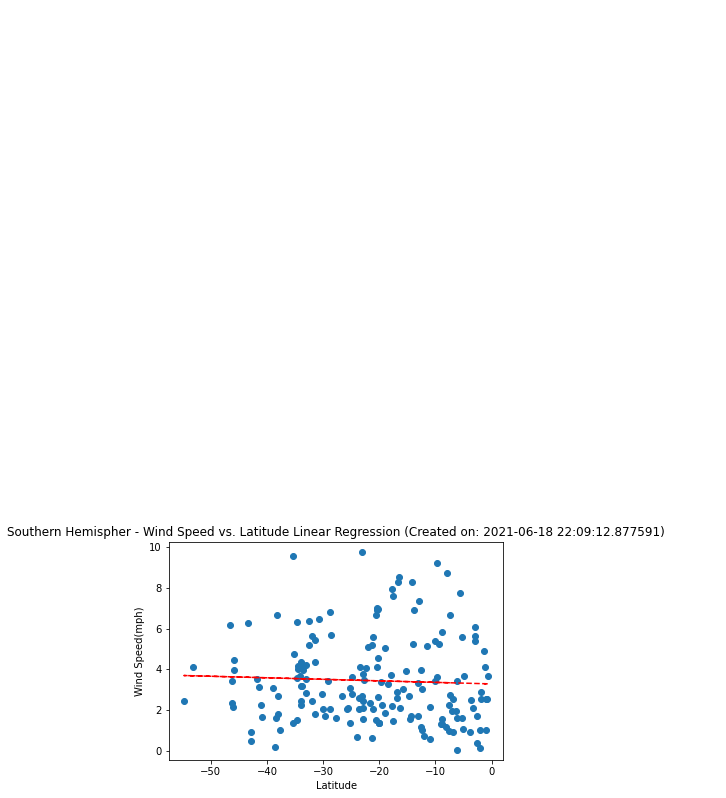

In [31]:
# Calculate the correlation coefficient and linear regression model eight=Capomulin_weight_volume.iloc[:,0]
lat=Southern_Hemisphere.iloc[:,2]
Wind_Speed=Southern_Hemisphere.iloc[:,5]
correlation=st.pearsonr(lat,Wind_Speed)
slope, intercept, rvalue, pvalue, stderr = st.linregress(lat,Wind_Speed)
regress_values=lat*slope+intercept
regress_values
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(lat,Wind_Speed)
plt.plot(lat,regress_values,"--",color="r")
plt.annotate(line_eq,(20,36),fontsize=15,color="r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"Southern Hemispher - Wind Speed vs. Latitude Linear Regression (Created on: {x})")
print(f"the correlation between Latitude and Wind Speed is {round(correlation[0],2)}")
print(f"R squared: {rvalue**2}") 
plt.savefig("../output_data/Southern_Hemisphere lat vs Wind Speed linear regressoin.png") 
plt.show()  

The correlation between wind speed and Latitude in southern hemisphere is -0.05, indicates no correlation between these two factors.